In [6]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from math import sin, cos, exp, pi

## Functions

In [2]:
# Function for generating the circumference of the domain

# Input1: the width of the domain
# Input2: the height of the domain
# Input3: the divison point - the relative height of the full rectangle
# Input4: the border_dist - sets the distance of the border from the cirucmference
# Output: list of the following:
#    x coordinates of the circumference
#    y coordinates of the circumference
#    x coordinates of the inner domain
#    y coordinates of the inner domain
#    x coordinates of the border
#    y coordinates of the border

def rect_circ2(width, height, devision_point, border_dist):
    
    # Creating lists to save the coordinates
    x_coord_circ = []
    y_coord_circ = []
    
    x_filled = []
    y_filled = []
    
    x_border = []
    y_border = []

    # Generating the coordinates
    x_lower_upper = list(np.array(range(int(-width/2*100), int(width/2*100)))/100)
    y_lower = [-height/2]*len(x_lower_upper)
    y_upper = [height/2]*len(x_lower_upper)

    y_left_right = list(np.array(range(int(-height/2*100), int(height/2*100)))/100)
    x_left = [-width/2]*len(y_left_right)
    x_right = [width/2]*len(y_left_right)
    
####################################################################################  
    
    # Generating the circumference
    x_coord_circ += x_lower_upper + x_left + x_right
    y_coord_circ += y_lower + y_left_right + y_left_right
    
    # Generating the upper parts of the domain
    x_temp1 = x_lower_upper[int(len(x_lower_upper)/10*0):int(len(x_lower_upper)/10*2)]
    x_temp3 = x_lower_upper[int(len(x_lower_upper)/10*4):int(len(x_lower_upper)/10*6)]
    x_temp5 = x_lower_upper[int(len(x_lower_upper)/10*8):int(len(x_lower_upper)/10*10)]  
    x_coord_circ += x_temp1 + x_temp3 + x_temp5
    y_coord_circ += [height/2]*len(x_temp1) * 3
    
    # Generating the lower parts of the domain
    x_temp2 = x_lower_upper[int(len(x_lower_upper)/10*2):int(len(x_lower_upper)/10*4)]
    x_temp4 = x_lower_upper[int(len(x_lower_upper)/10*6):int(len(x_lower_upper)/10*8)]
    x_coord_circ += x_temp2 + x_temp4
    y_coord_circ += [y_left_right[int(len(y_left_right)*devision_point)]]*len(x_temp2)*2
    
    # Generating the perpendicular parts of the domain
    y_temp1 = y_left_right[int(len(y_left_right)*devision_point):]
    y_coord_circ += y_temp1*4
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*2)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*4)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*6)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*8)]] * len(y_temp1) 
    
####################################################################################    
    
    # Generating the outer border - lower and upper
    x_lower_upper_border = list(np.array(range(int((-width-border_dist)/2*200), int((width + border_dist)/2*200)))/200)
    y_lower_border = [(-height - border_dist)/2]*len(x_lower_upper_border)
    y_upper_border = [(height + border_dist)/2]*len(x_lower_upper_border)
    
    # Generating the outer border - left and right
    y_left_right_border = list(np.array(range(int((-height - border_dist)/2*100), int((height + border_dist)/2*100)))/100)
    x_left_border = [(-width - border_dist)/2]*len(y_left_right_border)
    x_right_border = [(width + border_dist)/2]*len(y_left_right_border)
    
    # Generating the outer border - perpendicular
    y_temp_bord = list(np.array(y_left_right[int(len(y_left_right)*devision_point):]) + border_dist/2)
    x_mid_bord1 = [x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord2 = [x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2] * len(y_temp_bord)
    x_mid_bord3 = [x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord4 = [x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2] * len(y_temp_bord)   
    
    # Generating the outer border - upper part
    index_of_temp1 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2)
    index_of_temp2 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2)
    index_of_temp3 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2)
    index_of_temp4 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2)
    
    x_upper_bord1 = x_lower_upper_border[0:index_of_temp1]
    x_upper_bord2 = x_lower_upper_border[index_of_temp1:index_of_temp2]
    x_upper_bord3 = x_lower_upper_border[index_of_temp2:index_of_temp3]
    x_upper_bord4 = x_lower_upper_border[index_of_temp3:index_of_temp4]
    x_upper_bord5 = x_lower_upper_border[index_of_temp4:]
    
    y_upper_border1 = [(height + border_dist)/2]*len(x_upper_bord1)
    y_upper_border2 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord2)      
    y_upper_border3 = [(height + border_dist)/2]*len(x_upper_bord3) 
    y_upper_border4 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord4)     
    y_upper_border5 = [(height + border_dist)/2]*len(x_upper_bord5)  
    
    
    # Appending everything to the lists
    x_border += x_lower_upper_border + x_left_border + x_right_border + x_mid_bord1 + x_mid_bord2 + x_mid_bord3 + x_mid_bord4 + x_upper_bord1 + x_upper_bord2 + x_upper_bord3 + x_upper_bord4 + x_upper_bord5
    y_border += y_lower_border + y_left_right_border + y_left_right_border  + y_temp_bord*4 + y_upper_border1 + y_upper_border2 + y_upper_border3 + y_upper_border4 + y_upper_border5

    
####################################################################################    
    
    # Filling up the lower devision_point of the rectangle
    for i in range(1,int(len(y_left_right) * devision_point)-1):
        #appending the x and y coordinates
        x_filled += x_lower_upper[1:-1]
        y_filled += [y_left_right[i]]*len(x_lower_upper[1:-1])
    
    # Filling up the rest of the domain
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):        
        temp = x_lower_upper[int(len(x_lower_upper)/10*0)+1:int(len(x_lower_upper)/10*2)-1]      
        x_filled += temp
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*4)+1:int(len(x_lower_upper)/10*6)-1]
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*8)+1:int(len(x_lower_upper)/10*10)-1]
        y_filled += [y_left_right[i]]*len(temp)*3
        
####################################################################################  
    
    # Returning the coordinates
    return [x_coord_circ, y_coord_circ, x_filled, y_filled, x_border, y_border]

In [3]:
# Function for plotting the domain

# Input1: x coordinates of the circumference
# Input2: y coordinates of the circumference
# Input3: x coordinates of the inner domain
# Input4: y coordinates of the inner domain
# Input5: x coordinates of the border
# Input6: y coordinates of the border
# Input7: savefig boolean - if true, the figure is saved as "domain.jpg"

def rect_plot(x_coordinates, y_coordinates, x_filled, y_filled, x_border, y_border, savefig):

    plt.figure(figsize = (6,6))
    
    plt.scatter(x_coordinates, y_coordinates, color = 'crimson', s = 5)
    plt.scatter(x_filled, y_filled, color = 'lightcoral', s = 0.5, alpha = 0.01)
    plt.scatter(x_border, y_border, color = 'darkred', s = 5)

    plt.title('The generated domain with width = ' + str(width) + ', height = ' + str(height), fontsize = 18, y = 1.05)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    
    #plt.tight_layout()
    plt.grid()
    
    custom_lines = [Line2D([0], [0], color='darkred', lw=5), 
                    Line2D([0], [0], color='crimson', lw=5),
                    Line2D([0], [0], color='lightcoral', lw=5),]
    
    plt.legend(custom_lines, ['Border', 'Circumference', 'Domain'], bbox_to_anchor=(1.05, 1), loc=2, fontsize = 15)
    
    if savefig == True:
        plt.savefig('domain.jpg', dpi = 600, bbox_inches='tight')
    
    plt.show()

## Generating the domain

In [4]:
# Setting the width and height
width = 10
height = 10

# Setting the division point - the relative height of the full rectangle
devision_point = 1/3

# Setting the border distance
border_dist = width / 10

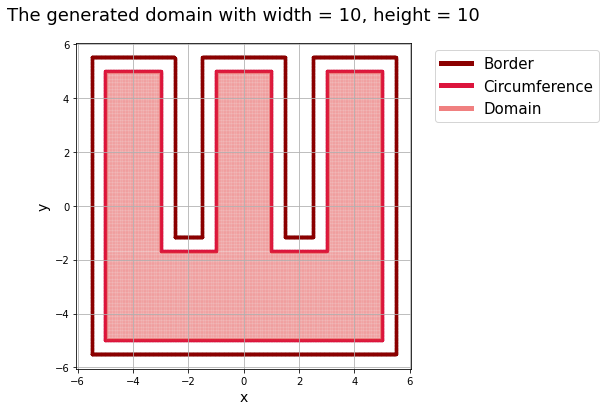

In [5]:
# Generating the domain 
x_y_coord = rect_circ2(width, height, devision_point, border_dist)

# Circumference
x_coordinates = x_y_coord[0]
y_coordinates = x_y_coord[1]

# Inner domain
x_filled = x_y_coord[2]
y_filled = x_y_coord[3]

# Outer border
x_border = x_y_coord[4]
y_border = x_y_coord[5]

# Plotting the domain
savefig = False
rect_plot(x_coordinates, y_coordinates, x_filled, y_filled, x_border, y_border, savefig)